In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('filter.csv')
data.head()

,wid [mm],Freq [GHz],"dB(S(1,1)) []","dB(S(2,1)) []","dB(S(1,2)) []","dB(S(2,2)) []"
0,2.8,1.000,-39.348344,-0.131716,-0.131716,-44.389919
1,2.8,1.001,-39.338752,-0.131856,-0.131856,-44.377891
2,2.8,1.002,-39.329157,-0.131996,-0.131996,-44.365739
3,2.8,1.003,-39.319559,-0.132136,-0.132136,-44.353464
4,2.8,1.004,-39.309959,-0.132275,-0.132275,-44.341068


In [ ]:
x = data.iloc[:, :2]
x.head()

,wid [mm],Freq [GHz]
0,2.8,1.000
1,2.8,1.001
2,2.8,1.002
3,2.8,1.003
4,2.8,1.004


In [ ]:
y = data.iloc[:, 2:]
y.head()

,"dB(S(1,1)) []","dB(S(2,1)) []","dB(S(1,2)) []","dB(S(2,2)) []"
0,-39.348344,-0.131716,-0.131716,-44.389919
1,-39.338752,-0.131856,-0.131856,-44.377891
2,-39.329157,-0.131996,-0.131996,-44.365739
3,-39.319559,-0.132136,-0.132136,-44.353464
4,-39.309959,-0.132275,-0.132275,-44.341068


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [ ]:
y_train.head()

,"dB(S(1,1)) []","dB(S(2,1)) []","dB(S(1,2)) []","dB(S(2,2)) []"
75259,-32.239001,-0.588835,-0.588835,-31.721912
61994,-23.540651,-1.433043,-1.433043,-23.667123
68946,-21.793590,-1.028321,-1.028321,-21.797364
38478,-25.610860,-0.470432,-0.470432,-25.641127
27286,-26.516915,-0.161833,-0.161833,-26.407063


In [ ]:
input_shape = [x_train.shape[1]]
input_shape

[2]

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='linear' ,input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='linear'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                192       
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='mae')

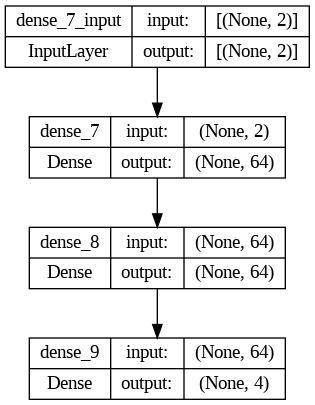

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
model.fit(x_train, y_train['dB(S(1,1)) []'], epochs=10)

Epoch 1/10
2666/2666 [==============================] - 5s 2ms/step - loss: 4.9419
Epoch 2/10
2666/2666 [==============================] - 6s 2ms/step - loss: 3.8014
Epoch 3/10
2666/2666 [==============================] - 5s 2ms/step - loss: 3.7836
Epoch 4/10
2666/2666 [==============================] - 5s 2ms/step - loss: 3.7890
Epoch 5/10
2666/2666 [==============================] - 5s 2ms/step - loss: 3.7807
Epoch 6/10
2666/2666 [==============================] - 5s 2ms/step - loss: 3.7749
Epoch 7/10
2666/2666 [==============================] - 6s 2ms/step - loss: 3.7766
Epoch 8/10
2666/2666 [==============================] - 5s 2ms/step - loss: 3.7765
Epoch 9/10
2666/2666 [==============================] - 5s 2ms/step - loss: 3.7727
Epoch 10/10
2666/2666 [==============================] - 6s 2ms/step - loss: 3.7719


In [ ]:
model.predict(x_train.iloc[0:3, :])

1/1 [==============================] - 0s 69ms/step


array([[-22.699987],
       [-24.008331],
       [-23.312656]], dtype=float32)

In [ ]:
model.fit(x_train, y_train['dB(S(2,1)) []'], epochs=10)
model.predict(x_train.iloc[0:3, :])

In [ ]:
model.fit(x_train, y_train['dB(S(1,2)) []'], epochs=10)
model.predict(x_train.iloc[0:3, :])

In [ ]:
model.fit(x_train, y_train['dB(S(2,2)) []'], epochs=10)
model.predict(x_train.iloc[0:3, :])